In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [541]:
data=pd.read_csv("Attrition_data.csv")
data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


In [542]:
data.isna().sum()

S.No                                 0
EmpID                                0
Emp Name                             0
DOJ                                  0
Designation                          0
Grade                                0
Attrition                            0
Location                             2
In Active Date                       0
Tenure                               0
Gender                               0
Education                            0
Age                                  0
Last Rating                          0
Monthly Income                       0
Engagement Score (% Satisfaction)    0
Marital Status                       0
Zone                                 0
Remarks                              0
dtype: int64

In [543]:
# data=data.dropna()
data["Location"]=data["Location"].fillna(data["Location"].mode()[0])

In [544]:
data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


In [545]:
data["DOJ"]=pd.to_datetime(data["DOJ"])
data["In Active Date"]=pd.to_datetime(data["In Active Date"])

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   S.No                               327 non-null    int64         
 1   EmpID                              327 non-null    object        
 2   Emp Name                           327 non-null    object        
 3   DOJ                                327 non-null    datetime64[ns]
 4   Designation                        327 non-null    object        
 5   Grade                              327 non-null    object        
 6   Attrition                          327 non-null    object        
 7   Location                           327 non-null    object        
 8   In Active Date                     327 non-null    datetime64[ns]
 9   Tenure                             327 non-null    object        
 10  Gender                             327

In [547]:
data["WorkingDays"]=data["In Active Date"]-data["DOJ"]
data["WorkingDays"]=data["WorkingDays"].dt.days
data=data.drop(["DOJ","In Active Date","S.No"],axis=1)

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   EmpID                              327 non-null    object
 1   Emp Name                           327 non-null    object
 2   Designation                        327 non-null    object
 3   Grade                              327 non-null    object
 4   Attrition                          327 non-null    object
 5   Location                           327 non-null    object
 6   Tenure                             327 non-null    object
 7   Gender                             327 non-null    object
 8   Education                          327 non-null    object
 9   Age                                327 non-null    int64 
 10  Last Rating                        327 non-null    int64 
 11  Monthly Income                     327 non-null    int64 
 12  Engageme

In [549]:
data.dtypes[data.dtypes=="object"]

EmpID                                object
Emp Name                             object
Designation                          object
Grade                                object
Attrition                            object
Location                             object
Tenure                               object
Gender                               object
Education                            object
Engagement Score (% Satisfaction)    object
Marital Status                       object
Zone                                 object
Remarks                              object
dtype: object

In [550]:
data=data.drop(["EmpID","Emp Name"],axis=1)

In [551]:
obj_data=data.dtypes[data.dtypes=="object"].index.to_list()
for i in obj_data:
    print(i,len(data[i].value_counts()))

Designation 10
Grade 7
Attrition  1
Location 140
Tenure 73
Gender 2
Education 2
Engagement Score (% Satisfaction) 98
Marital Status 3
Zone 9
Remarks 10


In [552]:
data["Designation"].unique()

array(['Sales Executive', 'Technical Services Officer', 'AM - Sales',
       'Sales Executive ', 'Sr Sales Executive', 'Sr Sales Executive ',
       ' Sales Executive', 'Regional Manager', 'Zonal Manager',
       'National Sales Head'], dtype=object)

In [553]:
data.loc[data['Designation'] == 'Sales Executive ', 'Designation'] = 'Sales Executive'
data.loc[data['Designation'] == ' Sales Executive', 'Designation'] = 'Sales Executive'
data.loc[data['Designation'] == 'Sr Sales Executive ', 'Designation'] = 'Sr Sales Executive'
data["Designation"].unique()

array(['Sales Executive', 'Technical Services Officer', 'AM - Sales',
       'Sr Sales Executive', 'Regional Manager', 'Zonal Manager',
       'National Sales Head'], dtype=object)

In [554]:
data["Zone"]

0         West
1        South
2      CENTRAL
3         West
4        North
        ...   
322      South
323      South
324      South
325      South
326       East
Name: Zone, Length: 327, dtype: object

In [555]:
data.loc[data['Zone'] == 'South', 'Zone'] = 'SOUTH'
data.loc[data['Zone'] == 'Central', 'Zone'] = 'CENTRAL'
data.loc[data['Zone'] == 'North', 'Zone'] = 'NORTH'

In [556]:
#since the Attrition column has only 1 value, we can drop it

In [557]:
data=data.drop(["Attrition "],axis=1)

In [558]:
obj_data=data.dtypes[data.dtypes=="object"].index.to_list()

In [559]:
data["Remarks"].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: count, dtype: int64

In [560]:
data.shape

(327, 14)

In [561]:
data.drop(data.loc[data["Remarks"]=="Reasons not known"].index,inplace=True)
data.drop(data.loc[data["Remarks"]=="Health Reasons"].index,inplace=True)
data.drop(data.loc[data["Remarks"]=="Termination - Theft"].index,inplace=True)

In [562]:
data.shape

(315, 14)

In [563]:
obj_data=data.dtypes[data.dtypes=="object"].index.to_list()
for i in obj_data:
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [564]:
data.head()

,Designation,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,WorkingDays
0,3,1,25,20,0,0,27,4,25535,13,0,5,3,551
1,5,4,63,23,1,1,36,2,52155,38,2,4,5,641
2,3,1,54,19,1,0,24,4,26438,11,0,0,3,535
3,0,3,1,38,1,0,33,2,54311,78,2,5,4,1433
4,3,1,58,25,1,0,24,4,26702,42,0,3,3,769


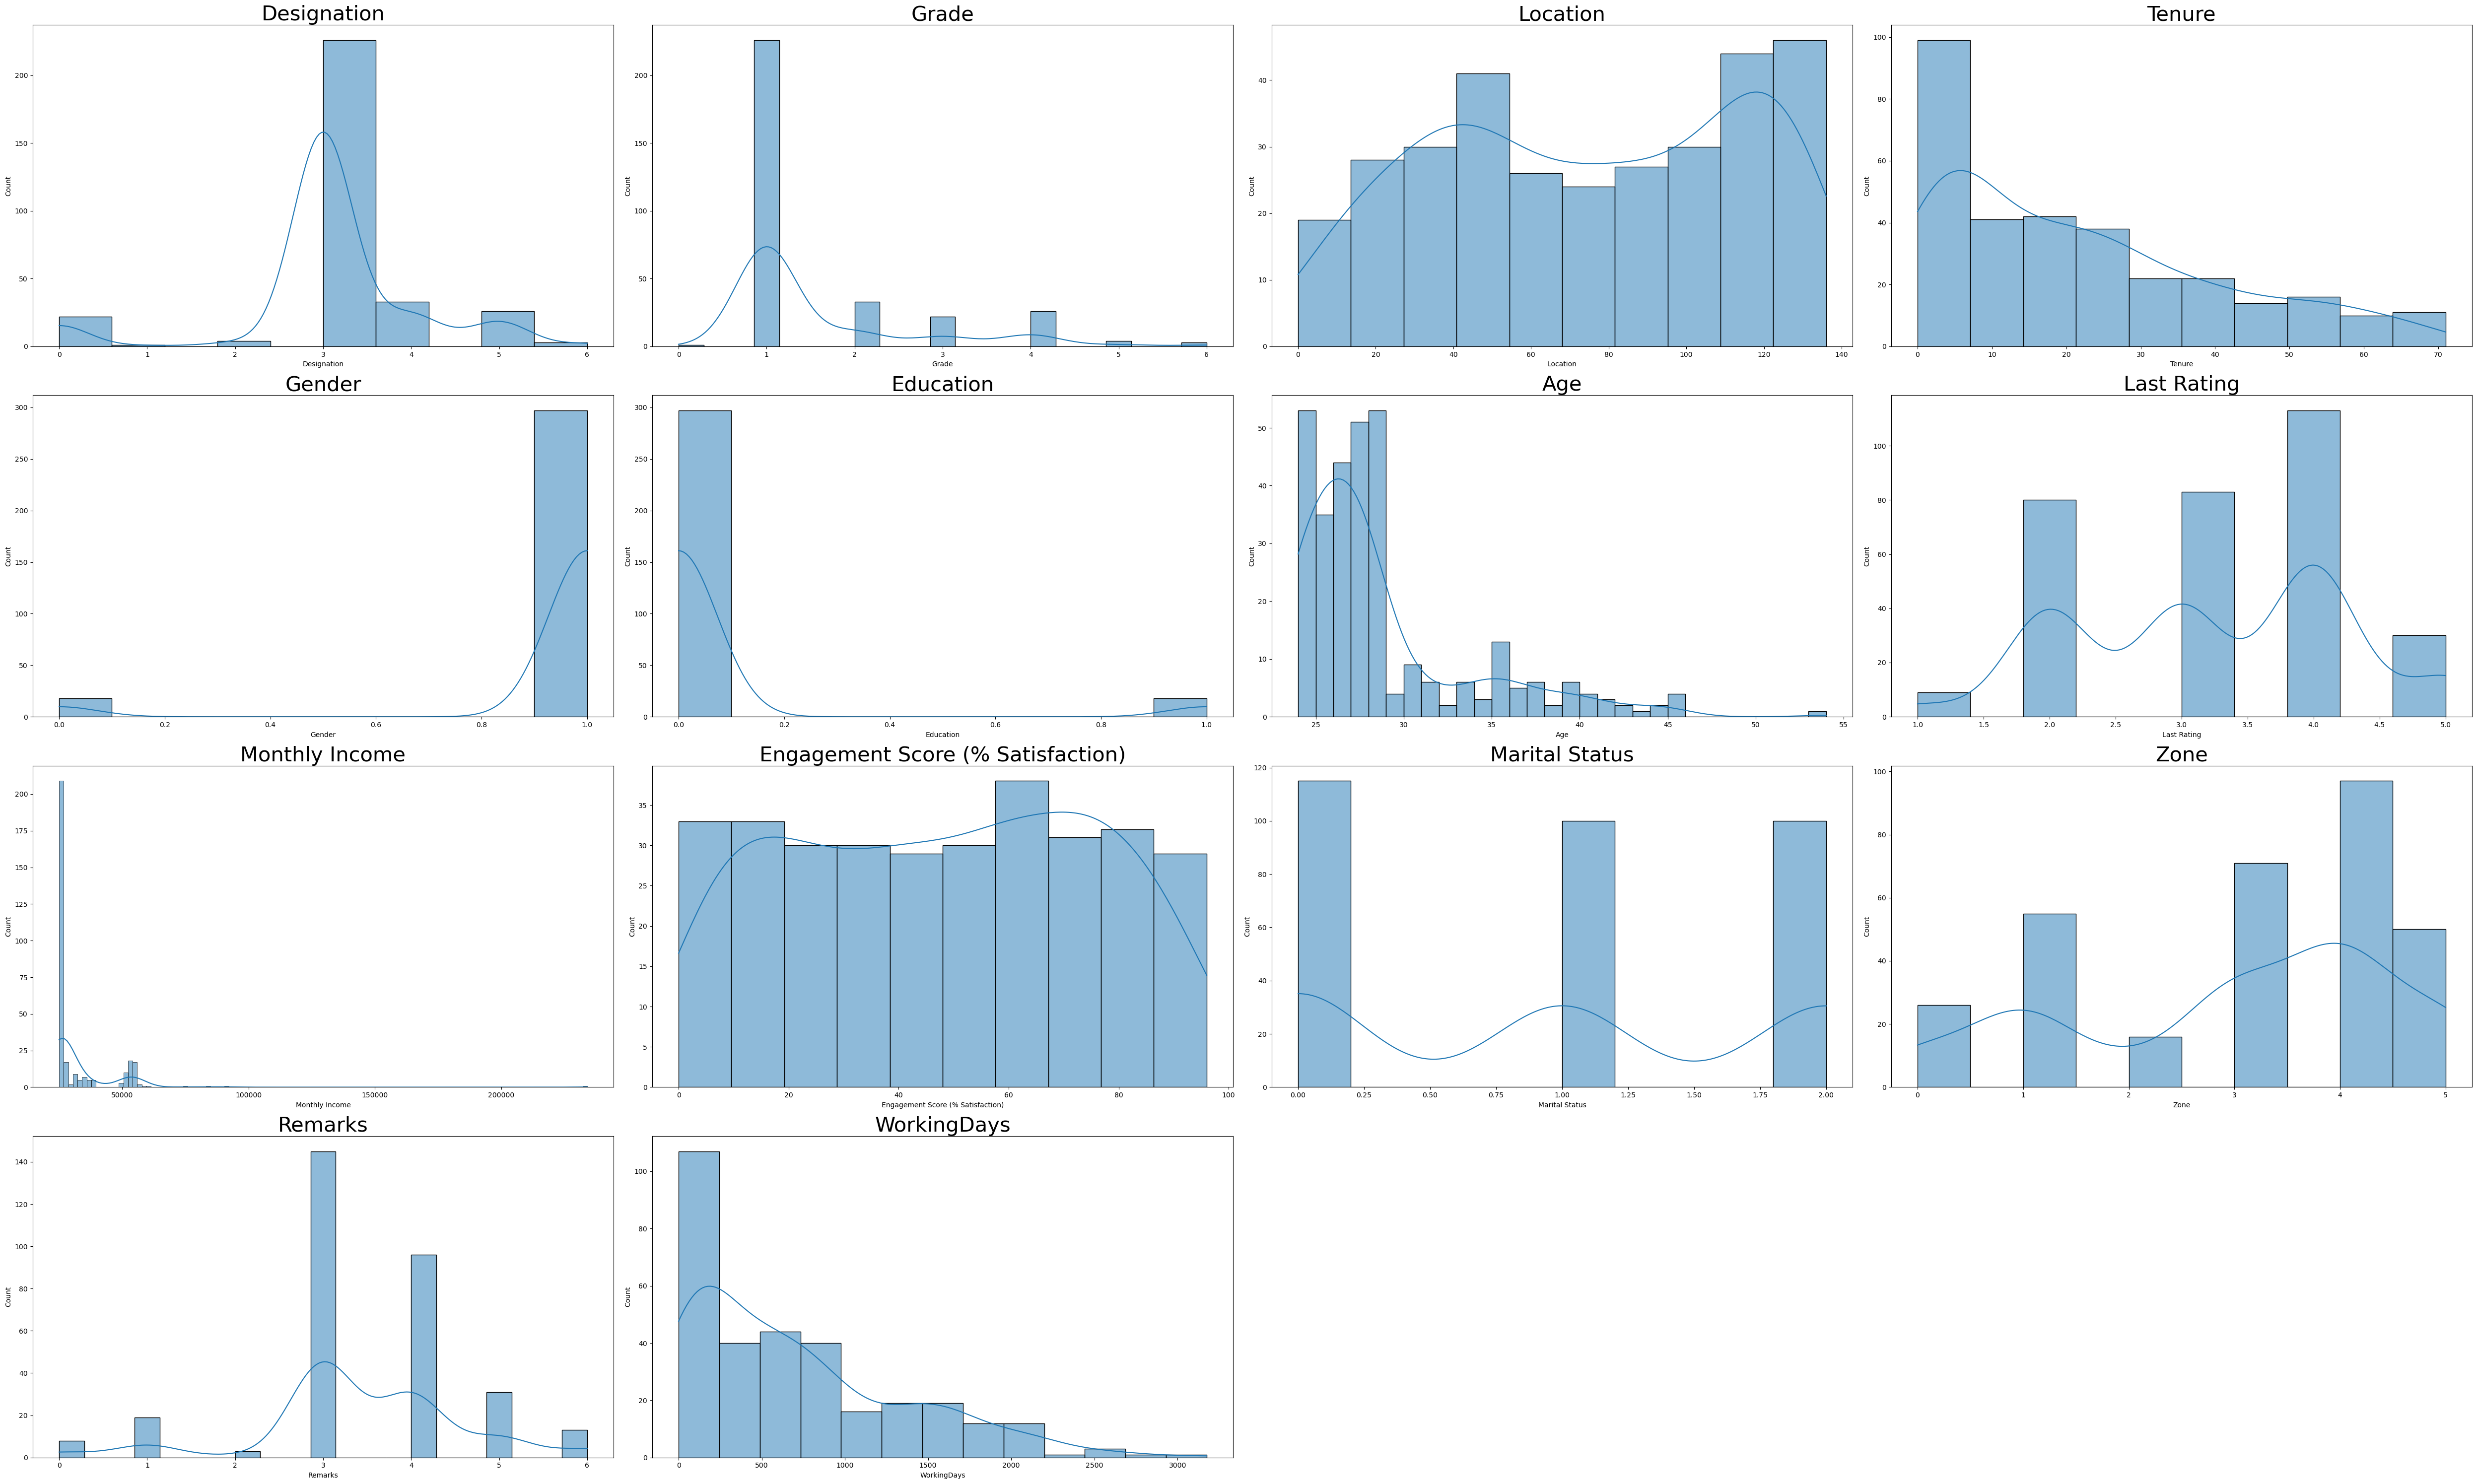

In [565]:
num_features = len(data.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(50, num_rows * 7.5))
count = 0
cols = data.columns.to_list()

for i in range(num_rows):
    for j in range(4):
        if count < num_features:
            sns.histplot(data[cols[count]], ax=axs[i, j], kde=True)
            axs[i, j].set_title(cols[count], fontsize=30)
            count += 1
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

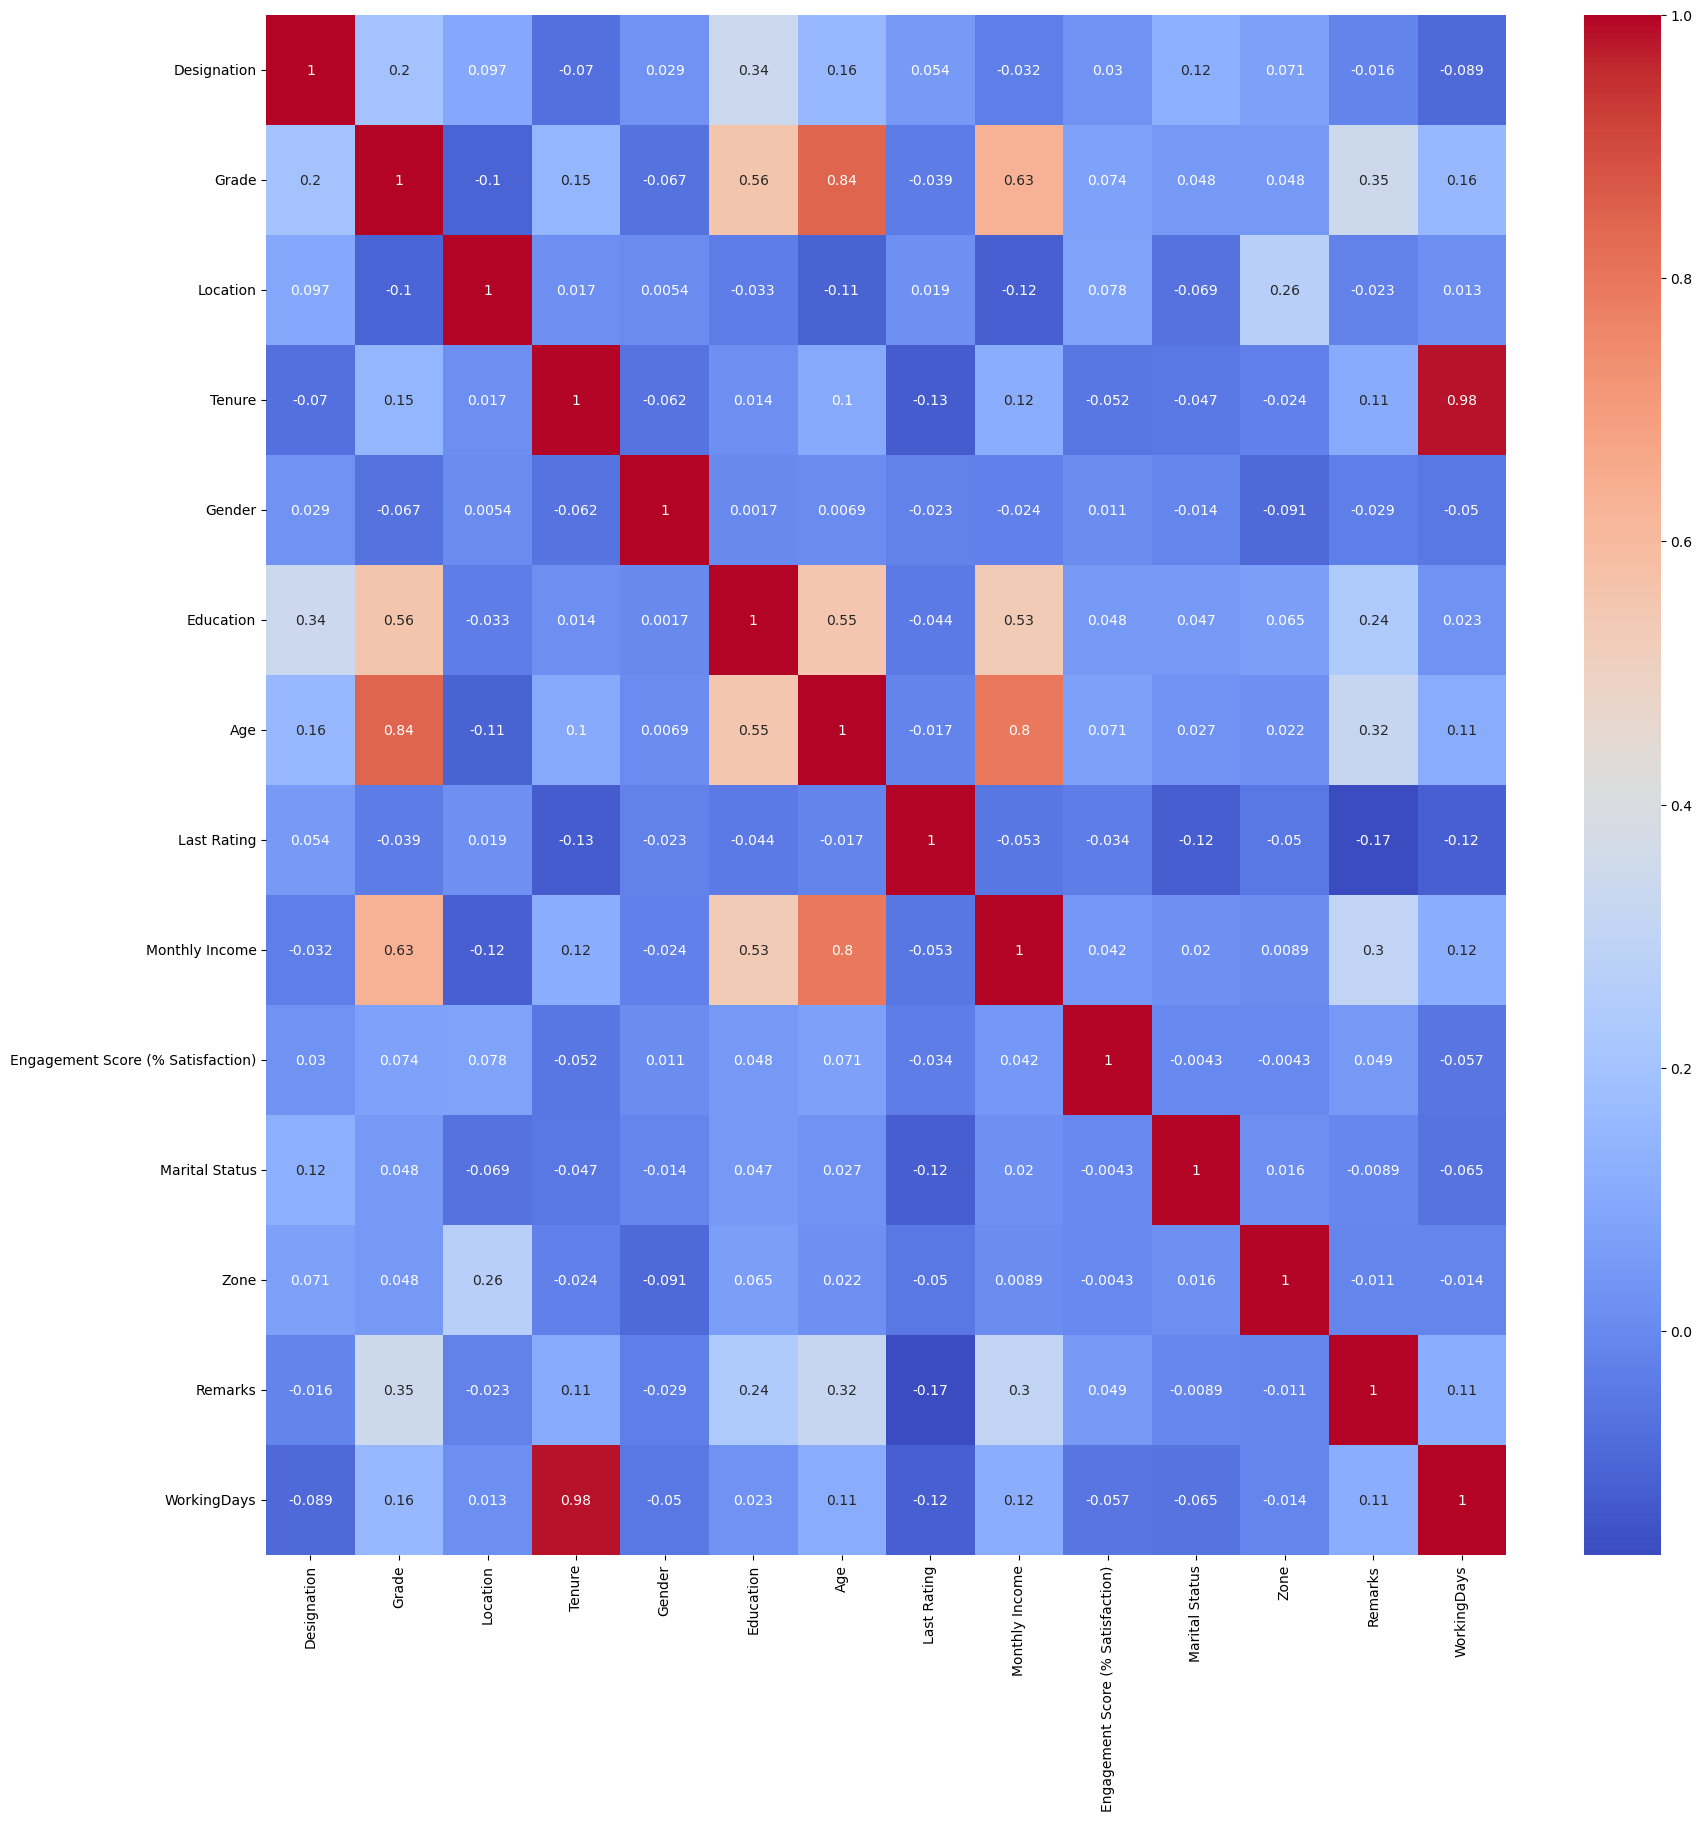

In [566]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

In [567]:
data.columns

Index(['Designation', 'Grade', 'Location', 'Tenure', 'Gender', 'Education',
       'Age', 'Last Rating', 'Monthly Income',
       'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone',
       'Remarks', 'WorkingDays'],
      dtype='object')

In [568]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,315.0,3.069841,1.083259,0.0,3.0,3.0,3.0,6.0
Grade,315.0,1.587302,1.109239,0.0,1.0,1.0,2.0,6.0
Location,315.0,74.584127,39.716211,0.0,41.0,77.0,113.0,136.0
Tenure,315.0,21.742857,18.753528,0.0,5.0,18.0,33.0,71.0
Gender,315.0,0.942857,0.232485,0.0,1.0,1.0,1.0,1.0
Education,315.0,0.057143,0.232485,0.0,0.0,0.0,0.0,1.0
Age,315.0,28.530159,5.078512,24.0,25.0,27.0,28.5,54.0
Last Rating,315.0,3.238095,1.026935,1.0,2.0,3.0,4.0,5.0
Monthly Income,315.0,32642.885714,16155.896765,25010.0,25708.5,26413.0,31916.0,233954.0
Engagement Score (% Satisfaction),315.0,47.666667,27.615882,0.0,22.5,48.0,71.5,96.0


In [569]:
data=data.drop(["Tenure","Marital Status","Location","Gender"],axis=1)

In [570]:
data.head()

,Designation,Grade,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Zone,Remarks,WorkingDays
0,3,1,0,27,4,25535,13,5,3,551
1,5,4,1,36,2,52155,38,4,5,641
2,3,1,0,24,4,26438,11,0,3,535
3,0,3,0,33,2,54311,78,5,4,1433
4,3,1,0,24,4,26702,42,3,3,769


In [571]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mn = MinMaxScaler()
data['WorkingDays'] = mn.fit_transform(data['WorkingDays'].values.reshape(-1,1))   
data['Monthly Income'] = mn.fit_transform(data['Monthly Income'].values.reshape(-1,1))
data["Age"]=mn.fit_transform(data["Age"].values.reshape(-1,1))
# data["Engagement Score (% Satisfaction)"]=sc

In [572]:
# data.head()

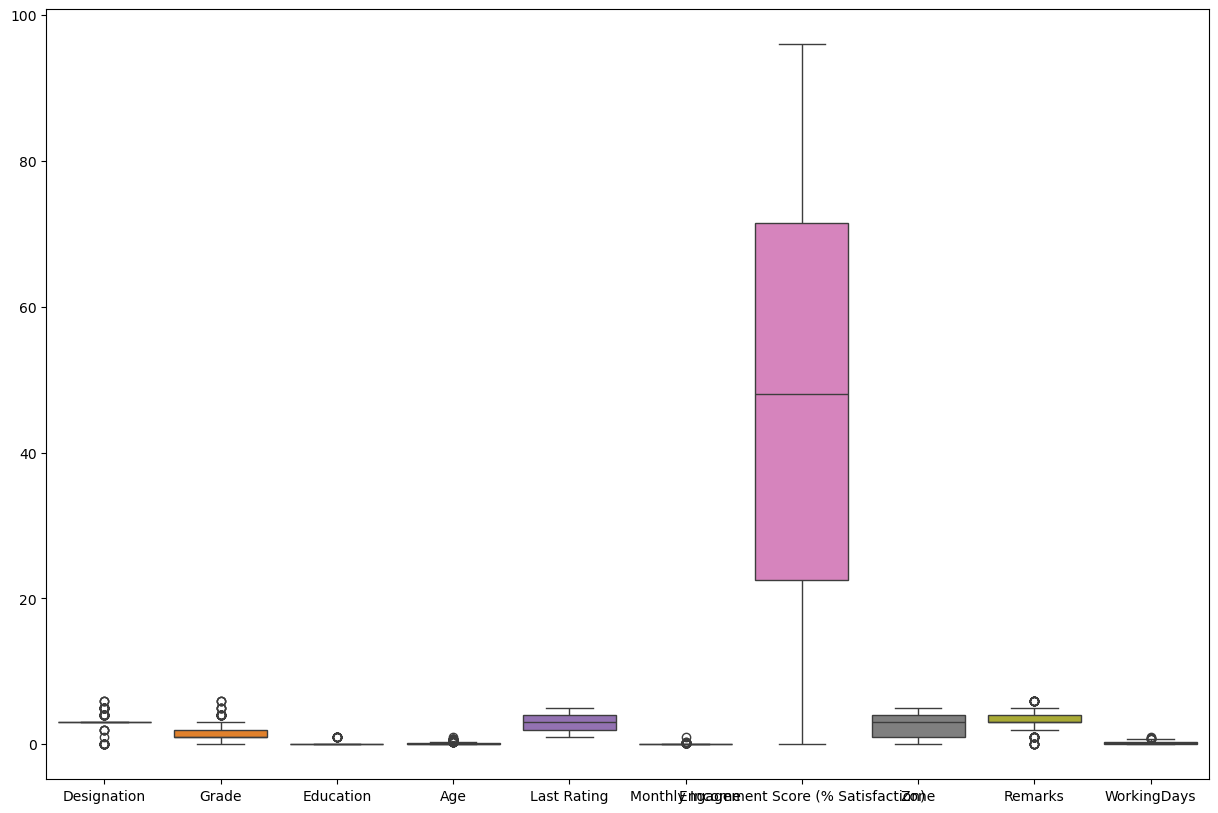

In [573]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.show()

In [574]:
X=data.drop(["Remarks"],axis=1)
y=data["Remarks"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=92)

# using Logistic Regression

In [575]:
model=LogisticRegression(solver='newton-cg',multi_class = 'multinomial',max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial', solver='newton-cg')

In [576]:
y_pred=model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5079365079365079


In [577]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.53      0.93      0.68        27
           4       0.45      0.23      0.30        22
           5       0.40      0.33      0.36         6
           6       0.00      0.00      0.00         3

    accuracy                           0.51        63
   macro avg       0.20      0.21      0.19        63
weighted avg       0.42      0.51      0.43        63



In [578]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 25,  2,  0,  0],
       [ 0,  0,  0, 15,  5,  2,  0],
       [ 0,  0,  0,  1,  3,  2,  0],
       [ 0,  0,  0,  3,  0,  0,  0]])

In [579]:
y_prob=model.predict_proba(X_test)

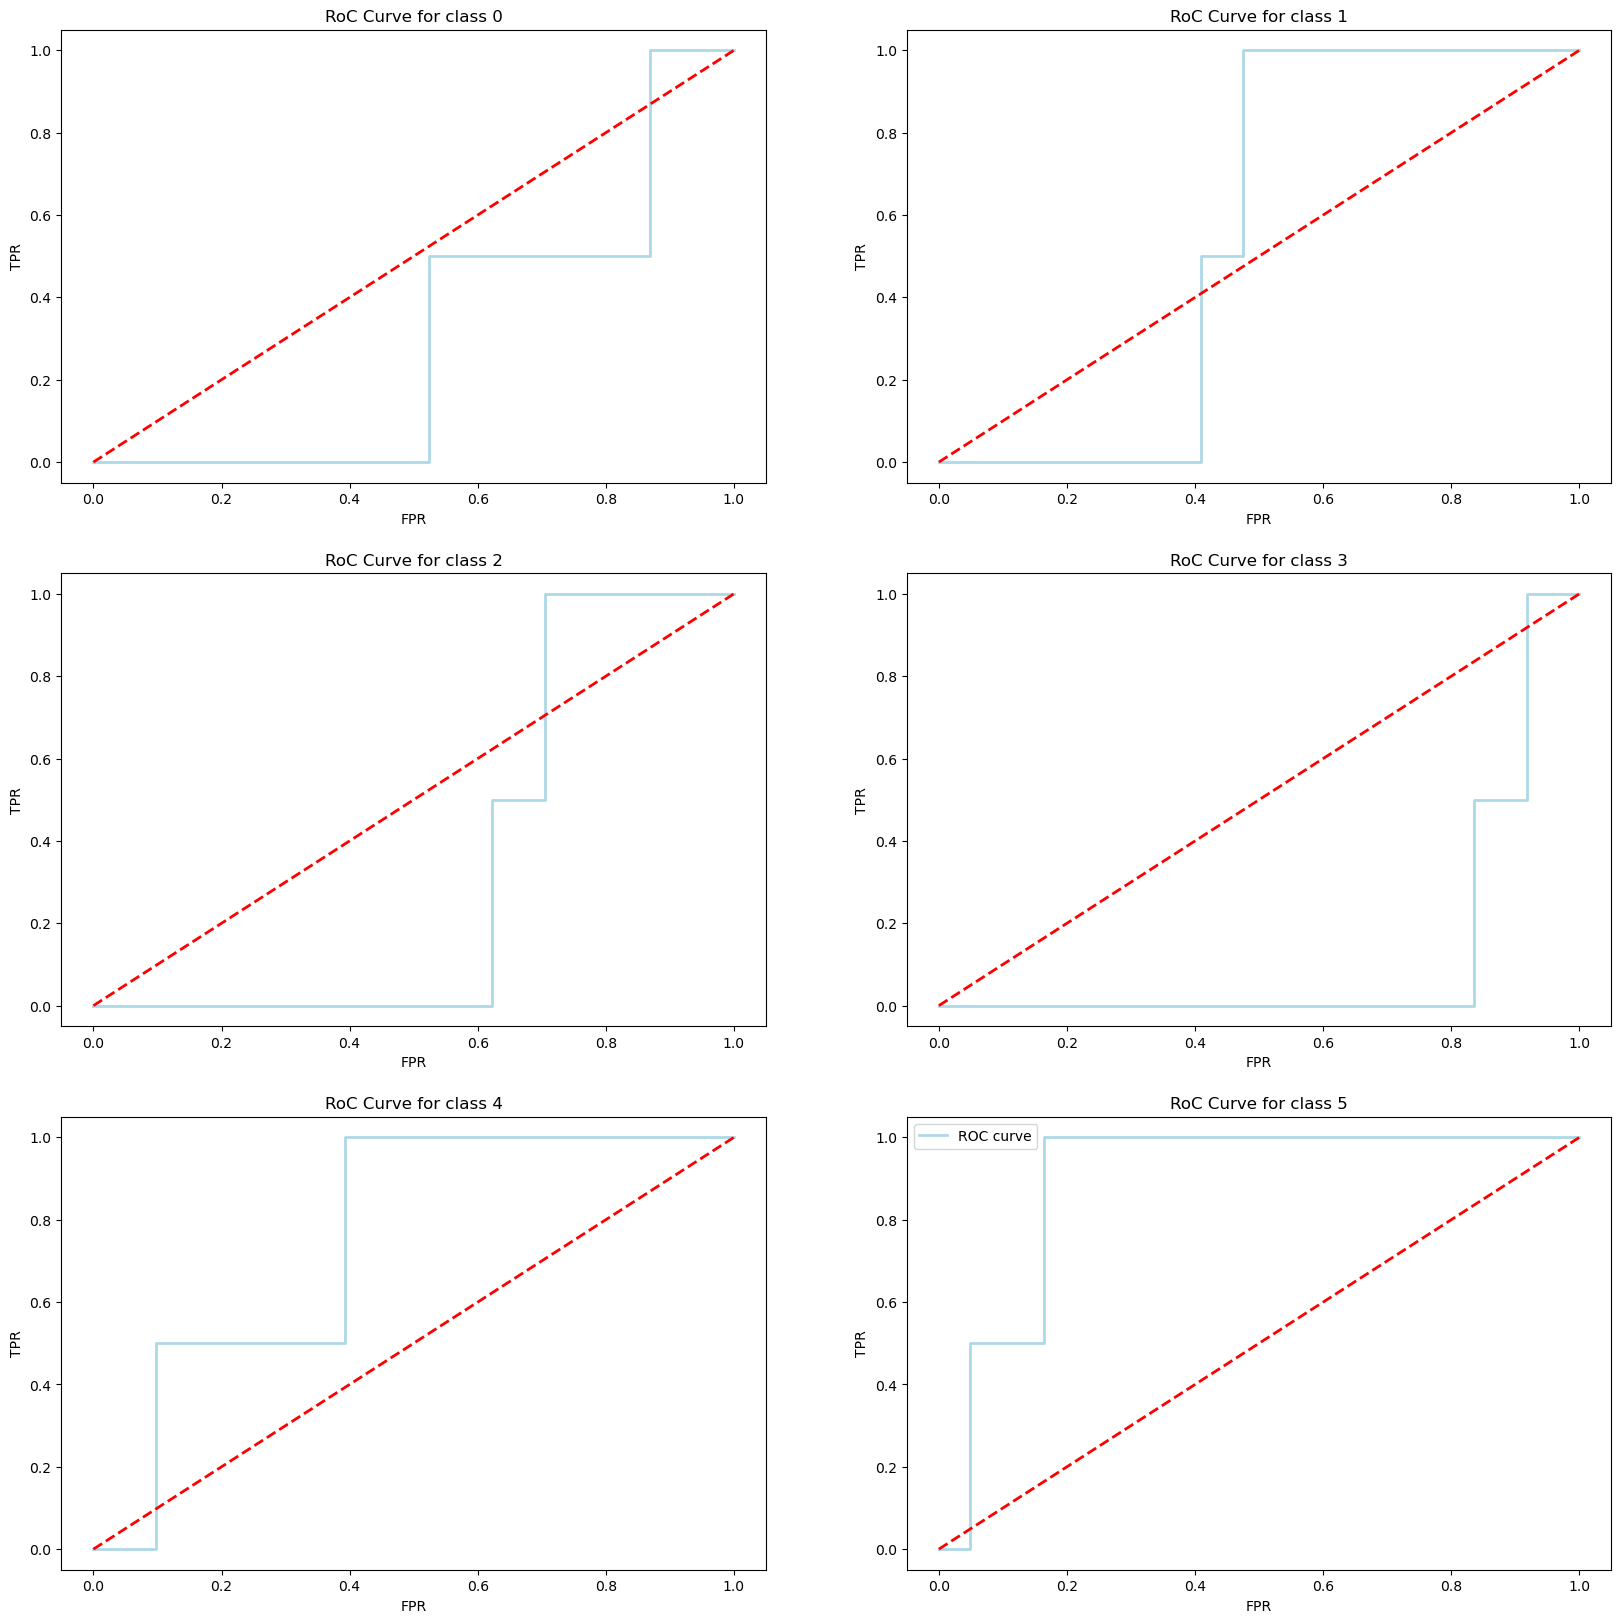

In [580]:
fig,axs=plt.subplots(3,2,figsize=(20,20))
count=0
for i in range(3):
    for j in range(2):
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:,count], pos_label=1)
        axs[i,j].plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve')
        axs[i,j].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
        axs[i,j].set_xlabel('FPR')
        axs[i,j].set_ylabel('TPR')
        axs[i,j].set_title('RoC Curve for class '+str(count))
        count+=1
plt.legend()

In [581]:
y_pred

array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 4, 3, 3, 5, 3, 3, 4, 5, 3, 3, 3, 3, 4, 3, 3, 3, 5, 3, 4, 3,
       3, 3, 4, 4, 3, 5, 3, 4, 3, 3, 3, 3, 3, 3, 4, 5, 3, 3, 3])

In [582]:
le.inverse_transform(y_pred)

array(['Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Lack of Growth',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Issues with the Manager', 'Issues with the Manager',
       'Lack of Growth', 'Issues with the Manager', 'Lack of Growth',
       'Issues with the Manager', 'Lack of Growth',
       'Issues with the Manager', 'Issues with the Manager',
       'More Challenging Job Roles/ Higher designation',
       'Issues with the Manager', 'Issues with the Manager',
       'Lack of Growth', 'More Challenging Job Roles/ Higher designation',
       'Issues with the